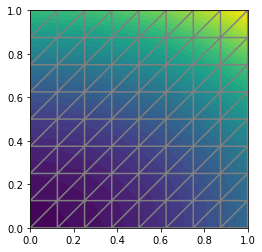

In [52]:
from __future__ import print_function
from fenics import *

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

plot(u)
plot(mesh);

In [59]:
u_np = u.compute_vertex_values(mesh)

In [72]:
mesh_np = mesh.coordinates()

In [73]:
import matplotlib.pyplot as plt

In [79]:
mesh_np.shape,  u_np.shape

((81, 2), (81,))

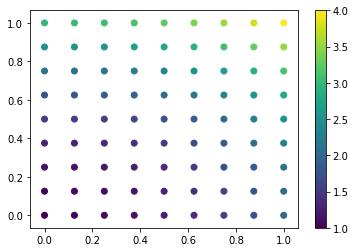

In [94]:
plt.scatter(mesh_np[:,0], mesh_np[:,1], c=u_np)
plt.colorbar()